In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv(r"C:\Users\Prabal Kuinkel\Desktop\Data Analyst\PYTHON JUPYTERNOOTBOOK\Data sets and notes\Zomato data set\zomato.csv",encoding='latin-1')
df.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5516,309178,Kumar Pastry Shop,1,New Delhi,"6/33, Moti Nagar, New Delhi",Moti Nagar,"Moti Nagar, New Delhi",77.141413,28.658983,"Bakery, Fast Food",300,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,31
8282,309318,Bakes & Cakes,1,Noida,"Royal Paradise Hotel, Shop 3 & 4, Y 349C, Near...",Sector 12,"Sector 12, Noida",77.344064,28.596894,Bakery,250,Indian Rupees(Rs.),No,Yes,No,No,1,3.0,Orange,Average,5
6080,302011,Anupama Snacks and Sweets Corner,1,New Delhi,"RZ H2/15, Bengali Colony, Mahavir Enclave, Pal...",Palam,"Palam, New Delhi",77.084282,28.610646,Mithai,100,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


# Pandas_profiling 

In [3]:
# from pandas_profiling import ProfileReport
# rep = ProfileReport(df)
# rep.to_file('ZomatoEDA.html')

# EDA Starts

In [4]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3341,302555,Hotel Tamil Nadu,1,New Delhi,"Dilli Haat, INA, New Delhi","Dilli Haat, INA","Dilli Haat, INA, New Delhi",77.206339,28.572980,South Indian,350,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,13
4670,313299,Perch Wine & Coffee Bar,1,New Delhi,"71, 1st Floor, Khan Market, New Delhi",Khan Market,"Khan Market, New Delhi",77.226190,28.599877,"Cafe, European",2000,Indian Rupees(Rs.),No,No,No,No,4,4.2,Green,Very Good,551
105,17293409,Sr. Sol 1,216,Athens,"175 Tallassee Rd, Athens, GA 30606",Athens,"Athens, Athens",-83.429300,33.965200,Mexican,10,Dollar($),No,No,No,No,1,4.6,Dark Green,Excellent,917
2603,301440,New Bakers Shoppee,1,New Delhi,"A-12, Alaknanda Shopping Complex, Opposite ICI...",Alaknanda,"Alaknanda, New Delhi",77.254021,28.525539,"Bakery, Fast Food",200,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,21
4025,18481317,Frugurpop- ibis New Delhi,1,New Delhi,"ibis New Delhi, Asset 9, Hospitality District,...","ibis New Delhi, Aerocity","ibis New Delhi, Aerocity, New Delhi",0.000000,0.000000,"Ice Cream, Desserts",300,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

# What is the distribution of restaurant ratings?

<Axes: xlabel='Rating text', ylabel='count'>

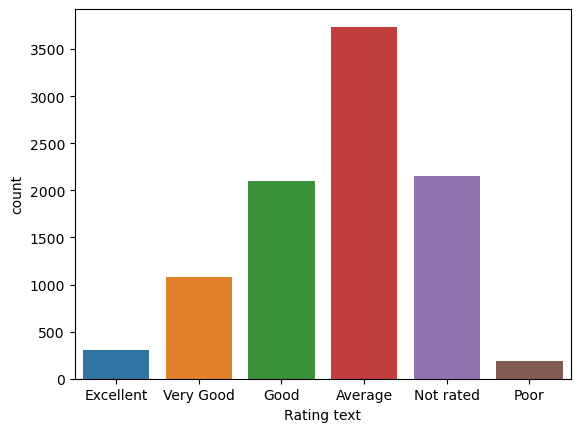

In [7]:
sns.countplot(data=df,x='Rating text')

# Calculaing the aggregate rating for each restaurant

In [46]:
df.groupby('Restaurant Name').agg({'Aggregate rating':'mean'})

,Aggregate rating
Restaurant Name,
Let's Burrrp,0.0
#45,3.6
#Dilliwaala6,3.7
#InstaFreeze,0.0
#OFF Campus,3.7
...,...
t Lounge by Dilmah,3.6
tashas,4.1
wagamama,3.7


In [ ]:
# .flatten() converts a 2-D aaray into a 1-D array

In [45]:
aggrating_df=df.pivot_table(index='Restaurant Name',values='Aggregate rating').sort_values(by='Aggregate rating',ascending=False)[:5]
index=aggrating_df.index
val = aggrating_df.values.flatten()
val

array([4.9, 4.9, 4.9, 4.9, 4.9])

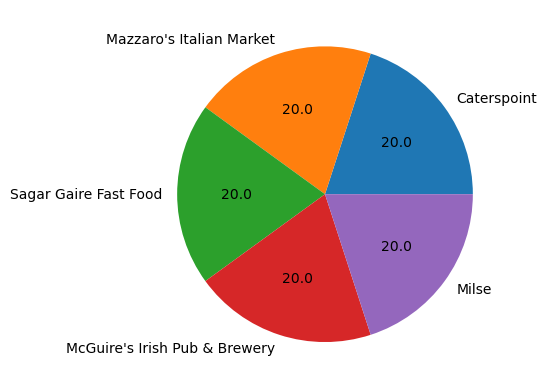

In [48]:
plt.pie(val,labels=index,autopct='%.1f')
plt.show()